<a href="https://colab.research.google.com/github/geekevgin/-Python/blob/main/HW_6_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("rafalib")
install.packages("effsize")
install.packages("BSDA")
install.packages("pwr")
library(httr)
library(dplyr)
library(rafalib)
library(effsize)
library(BSDA)
library(pwr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice


Attaching package: ‘BSDA’


The following object is masked from ‘package:datasets’:

    Orange




In [2]:
# Скачаем файл "cardio_train.csv"
filename <- "cardio_train.csv"
url <- "https://drive.google.com/uc?authuser=0&id=1qPKIRO3GfGNQK7rUFpZQWQRaNhTjHvJP&export=download"
GET(url, write_disk(filename, overwrite=TRUE))

Response [https://doc-00-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7vchl6fvknn073ttg95lj9n7c74iidu1/1688298600000/16531863302665455688/*/1qPKIRO3GfGNQK7rUFpZQWQRaNhTjHvJP?e=download&uuid=bca504d9-55a5-49f2-b12f-fe171bfeb727]
  Date: 2023-07-02 11:50
  Status: 200
  Content-Type: text/csv
  Size: 2.94 MB
<ON DISK>  cardio_train.csvNULL

In [3]:
df <- read.csv(filename, sep=";")
head(df, 3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,18393,2,168,62,110,80,1,1,0,0,1,0
2,1,20228,1,156,85,140,90,3,1,0,0,1,1
3,2,18857,1,165,64,130,70,3,1,0,0,0,1


In [4]:
df$age_years <- trunc(df$age / 365.25) #получим возраст в годах

In [5]:
tidy_set <- df %>% filter((ap_lo<200 & ap_lo>20) & (ap_hi<300 & ap_hi>40))
head(tidy_set) #фильтруем по давлению

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,0,18393,2,168,62,110,80,1,1,0,0,1,0,50
2,1,20228,1,156,85,140,90,3,1,0,0,1,1,55
3,2,18857,1,165,64,130,70,3,1,0,0,0,1,51
4,3,17623,2,169,82,150,100,1,1,0,0,1,1,48
5,4,17474,1,156,56,100,60,1,1,0,0,0,0,47
6,8,21914,1,151,67,120,80,2,2,0,0,0,0,59


In [6]:
tidy_set <- tidy_set[tidy_set$ap_hi > tidy_set$ap_lo,]
head(tidy_set) # выбираем данные, где верхнее АД выше нижнего

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,0,18393,2,168,62,110,80,1,1,0,0,1,0,50
2,1,20228,1,156,85,140,90,3,1,0,0,1,1,55
3,2,18857,1,165,64,130,70,3,1,0,0,0,1,51
4,3,17623,2,169,82,150,100,1,1,0,0,1,1,48
5,4,17474,1,156,56,100,60,1,1,0,0,0,0,47
6,8,21914,1,151,67,120,80,2,2,0,0,0,0,59


In [7]:
dim(tidy_set) #размерность

[1] 68678    14

In [8]:
set.seed(1) # зафиксируем последовательность
ind <- sample(seq(1, nrow(tidy_set)), 100) #выбираем 100 случайных строк для выборки из ДС
ind

[1] 24388 59521 43307 11571 25173 32618 13903  8229 25305 22306 12204 43809
 [13] 36244 45399  6519 19242 21875 58472 62956 21323 13284  7976  9392  3863
 [25] 52253 26876 13973 31334 39241 47959 28278 66394 11367 13602  5051 16920
 [37] 29660 56659 29697 11854 58661 51118 27075 22126 55091 58684 32987 12399
 [49] 25488 60772 55084 51305 17626  8465  6563 62126 20205 62480 68581 55968
 [61]  8615 41381 45196  9346 13824  8696 61798 61140 39557  7131 61256 51613
 [73] 10816 49461 11096 12597 24450  8613 44660  6217 30249 64953 12669 47181
 [85] 32441 23193 40942 20480 62492 68663 23836 11260  4182 27416 18540  5390
 [97] 30929 21842 18144 30407

In [10]:
ts <- tidy_set[ind,] #выбираем из набора tidy_set данных по ind
head(ts)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
24430,35507,15867,1,160,64,130,90,3,1,0,0,1,1,43
59613,86607,21740,1,159,62,110,70,1,2,0,0,1,1,59
43372,63061,19710,1,160,65,120,80,1,1,0,0,1,1,53
11592,16855,21865,1,164,68,120,80,1,1,0,0,1,0,59
25217,36636,23277,1,157,87,120,80,1,1,0,0,0,1,63
32669,47515,17551,2,167,78,140,100,1,1,0,0,0,1,48


In [11]:
dim(ts)

[1] 100  14

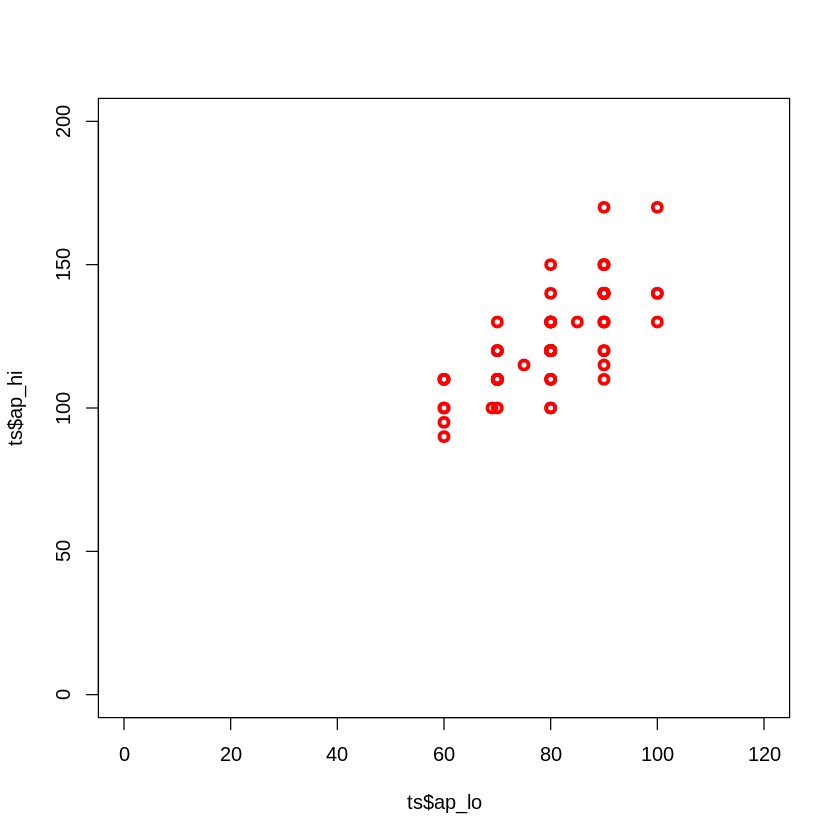

In [13]:
plot(ts$ap_lo, ts$ap_hi, xlim=c(0,120), ylim=c(0,200), col="red", lwd=3) #Видна линейная зависимость данных, ноданные не распределенны равномерно,
#fitm <- lm(ts$ap_hi ~ ts$ap_lo)
#больше их в центре, необходимо проверить на нормальность

In [14]:
fitm <- lm(ts$ap_hi ~ ts$ap_lo) #парная ЛР для двух переменных, нижнее давление будет выступать Х - независимая переменная. Получаем веса
fitm


Call:
lm(formula = ts$ap_hi ~ ts$ap_lo)

Coefficients:
(Intercept)     ts$ap_lo  
     32.961        1.121  


In [15]:
hi_hat <- 32.961 + 1.121 * ts$ap_lo # получим предсказания для верхнего АД
hi_hat

[1] 133.851 111.431 122.641 122.641 122.641 145.061 122.641 133.851 133.851
 [10] 122.641 122.641 133.851 111.431 111.431 111.431 133.851 111.431 117.036
 [19] 133.851 122.641 122.641 122.641 100.221 133.851 122.641 122.641 122.641
 [28] 122.641 122.641 122.641 122.641 122.641 122.641 111.431 122.641 100.221
 [37] 122.641 122.641 122.641 122.641 122.641 133.851 122.641 133.851 111.431
 [46] 122.641 133.851 128.246 122.641 133.851 100.221 110.310 122.641 133.851
 [55] 111.431 122.641 133.851 133.851 111.431 111.431 122.641 133.851 111.431
 [64] 122.641 122.641 133.851 122.641 100.221 122.641 111.431 145.061 111.431
 [73] 111.431 111.431 111.431 145.061 122.641 122.641 122.641 122.641 111.431
 [82] 122.641 122.641 122.641 100.221 100.221 133.851 133.851 133.851 122.641
 [91] 133.851 122.641 122.641 111.431 122.641 122.641 122.641 100.221 100.221
[100] 145.061

In [16]:
as.numeric(predict(fitm, ts))

[1] 133.8566 111.4353 122.6460 122.6460 122.6460 145.0673 122.6460 133.8566
  [9] 133.8566 122.6460 122.6460 133.8566 111.4353 111.4353 111.4353 133.8566
 [17] 111.4353 117.0406 133.8566 122.6460 122.6460 122.6460 100.2247 133.8566
 [25] 122.6460 122.6460 122.6460 122.6460 122.6460 122.6460 122.6460 122.6460
 [33] 122.6460 111.4353 122.6460 100.2247 122.6460 122.6460 122.6460 122.6460
 [41] 122.6460 133.8566 122.6460 133.8566 111.4353 122.6460 133.8566 128.2513
 [49] 122.6460 133.8566 100.2247 110.3142 122.6460 133.8566 111.4353 122.6460
 [57] 133.8566 133.8566 111.4353 111.4353 122.6460 133.8566 111.4353 122.6460
 [65] 122.6460 133.8566 122.6460 100.2247 122.6460 111.4353 145.0673 111.4353
 [73] 111.4353 111.4353 111.4353 145.0673 122.6460 122.6460 122.6460 122.6460
 [81] 111.4353 122.6460 122.6460 122.6460 100.2247 100.2247 133.8566 133.8566
 [89] 133.8566 122.6460 133.8566 122.6460 122.6460 111.4353 122.6460 122.6460
 [97] 122.6460 100.2247 100.2247 145.0673

In [17]:
signif(fitm$coefficients, 10) #возьмем коэф.модели

(Intercept)    ts$ap_lo 
  32.960740    1.121065

In [18]:
32.96074004 + 1.121065203*ts$ap_lo

[1] 133.8566 111.4353 122.6460 122.6460 122.6460 145.0673 122.6460 133.8566
  [9] 133.8566 122.6460 122.6460 133.8566 111.4353 111.4353 111.4353 133.8566
 [17] 111.4353 117.0406 133.8566 122.6460 122.6460 122.6460 100.2247 133.8566
 [25] 122.6460 122.6460 122.6460 122.6460 122.6460 122.6460 122.6460 122.6460
 [33] 122.6460 111.4353 122.6460 100.2247 122.6460 122.6460 122.6460 122.6460
 [41] 122.6460 133.8566 122.6460 133.8566 111.4353 122.6460 133.8566 128.2513
 [49] 122.6460 133.8566 100.2247 110.3142 122.6460 133.8566 111.4353 122.6460
 [57] 133.8566 133.8566 111.4353 111.4353 122.6460 133.8566 111.4353 122.6460
 [65] 122.6460 133.8566 122.6460 100.2247 122.6460 111.4353 145.0673 111.4353
 [73] 111.4353 111.4353 111.4353 145.0673 122.6460 122.6460 122.6460 122.6460
 [81] 111.4353 122.6460 122.6460 122.6460 100.2247 100.2247 133.8566 133.8566
 [89] 133.8566 122.6460 133.8566 122.6460 122.6460 111.4353 122.6460 122.6460
 [97] 122.6460 100.2247 100.2247 145.0673

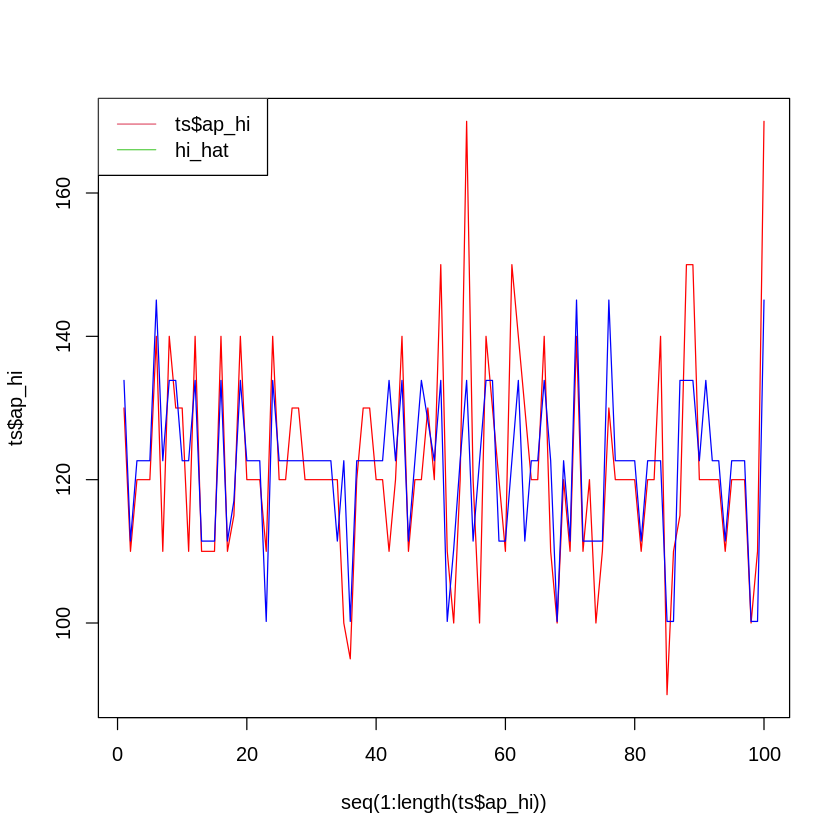

In [20]:
plot(seq(1:length(ts$ap_hi)), ts$ap_hi, col="red", type="l") #построим граффически истинное Y и предсказанное Y
lines(seq(1, length(hi_hat)), hi_hat, col="blue", type="l")
legend("topleft", c("ts$ap_hi", "hi_hat"), col=c(2,3), lty=c(1,1))

In [21]:
summary(fitm) #с посощью критерия Т-Стьюдента проверить значимость коэффицентов. Статистическим значим является коэффицент наклона(перед значениями АД)


Call:
lm(formula = ts$ap_hi ~ ts$ap_lo)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.857  -2.646  -2.646   6.143  36.143 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  32.9607     8.2713   3.985  0.00013 ***
ts$ap_lo      1.1211     0.1036  10.821  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.675 on 98 degrees of freedom
Multiple R-squared:  0.5444,	Adjusted R-squared:  0.5397 
F-statistic: 117.1 on 1 and 98 DF,  p-value: < 2.2e-16


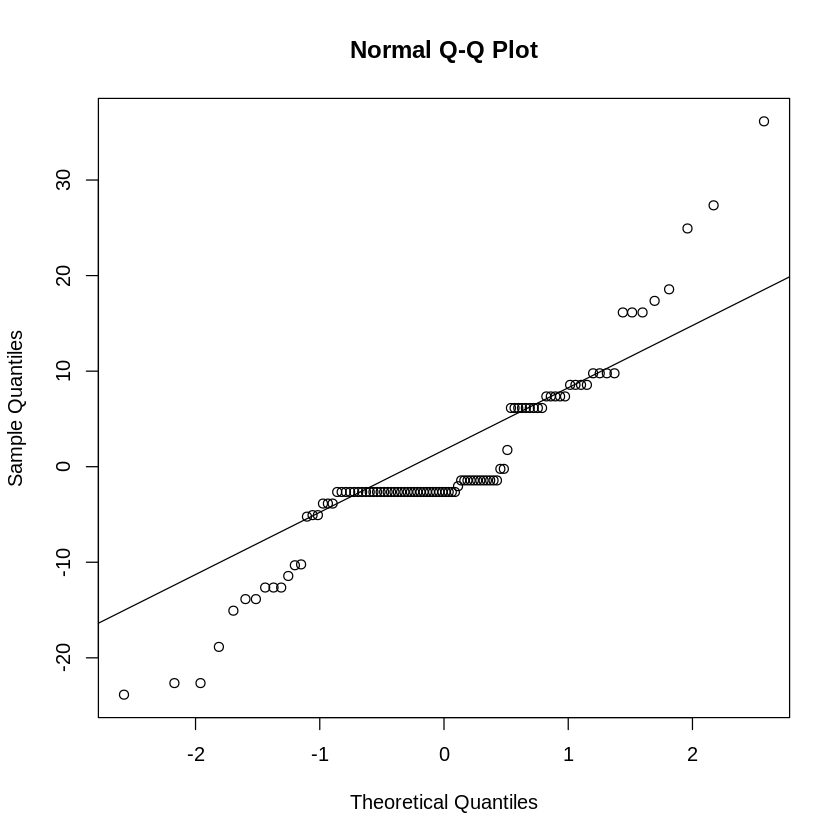

In [22]:
qqnorm(fitm$residuals) #проверка ошибок на нормальность для реализации модели ЛР
qqline(fitm$residuals)

In [23]:
rse <- sqrt(sum(residuals(fitm)^2) / fitm$df.residual)
rse

[1] 9.674722

In [24]:
Rs <- cor(ts$ap_hi, ts$ap_lo)^2 # описание части изменчивости Y, для улучшения описания модели можно добавить признаки доп-е
Rs

[1] 0.5443829

In [25]:
R_adj <- 1-((1-Rs)*((100-1)/(100-1-1))) # показывает вносят ли вклад новые признаки. Не достаточно хорошо описывает модель изменчивость Y
R_adj

[1] 0.5397338

In [26]:
tsn <- ts[,-c(1,2)] #Убираем из ДС(tsn) первые два столбца
head(tsn)

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
24430,1,160,64,130,90,3,1,0,0,1,1,43
59613,1,159,62,110,70,1,2,0,0,1,1,59
43372,1,160,65,120,80,1,1,0,0,1,1,53
11592,1,164,68,120,80,1,1,0,0,1,0,59
25217,1,157,87,120,80,1,1,0,0,0,1,63
32669,2,167,78,140,100,1,1,0,0,0,1,48


In [27]:
fit <- lm(tsn$ap_hi~., data=tsn) #возьмем все признаки для множественной ЛР
summary(fit)
# Видим два статистически значимых признака, влияющих на верхнее АД (нижнее АД, кардио)
# Adjusted R-squared выросло с 53 до 58


Call:
lm(formula = tsn$ap_hi ~ ., data = tsn)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.224  -5.954   0.527   3.642  31.716 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.286256  25.391474   0.956 0.341454    
gender      -3.615951   2.551325  -1.417 0.159931    
height       0.044289   0.157848   0.281 0.779689    
weight       0.007098   0.074875   0.095 0.924695    
ap_lo        1.049879   0.110798   9.476  4.3e-15 ***
cholesterol  0.232651   1.801735   0.129 0.897553    
gluc         0.400740   2.101891   0.191 0.849234    
smoke        0.452179   6.675098   0.068 0.946145    
alco         5.897386   5.878351   1.003 0.318497    
active       0.336393   2.355827   0.143 0.886781    
cardio       7.982523   2.229914   3.580 0.000562 ***
age_years    0.121480   0.146599   0.829 0.409540    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.168 on 88 degrees of freedom
Multiple R-squared

In [30]:
# построим модель ЛР со значимыми признаками
fit_ad <- lm(tsn$ap_hi~tsn$ap_lo+tsn$cardio) #возьмем все признаки для множественной ЛР
summary(fit_ad)
#Видно, что Adjusted R на много лучше уже описывает модель, но R чуть уменьшилось, тк только стат=ки значимые признаки, F-statistic выросла значительно, те независимые переменные влияют на зависимую


Call:
lm(formula = tsn$ap_hi ~ tsn$ap_lo + tsn$cardio)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.909  -6.699   1.108   3.285  33.285 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  38.7580     7.7815   4.981 2.76e-06 ***
tsn$ap_lo     1.0017     0.1001  10.009  < 2e-16 ***
tsn$cardio    7.8064     1.8726   4.169 6.66e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.955 on 97 degrees of freedom
Multiple R-squared:  0.6136,	Adjusted R-squared:  0.6056 
F-statistic: 77.02 on 2 and 97 DF,  p-value: < 2.2e-16


In [ ]:
#ANOVA.

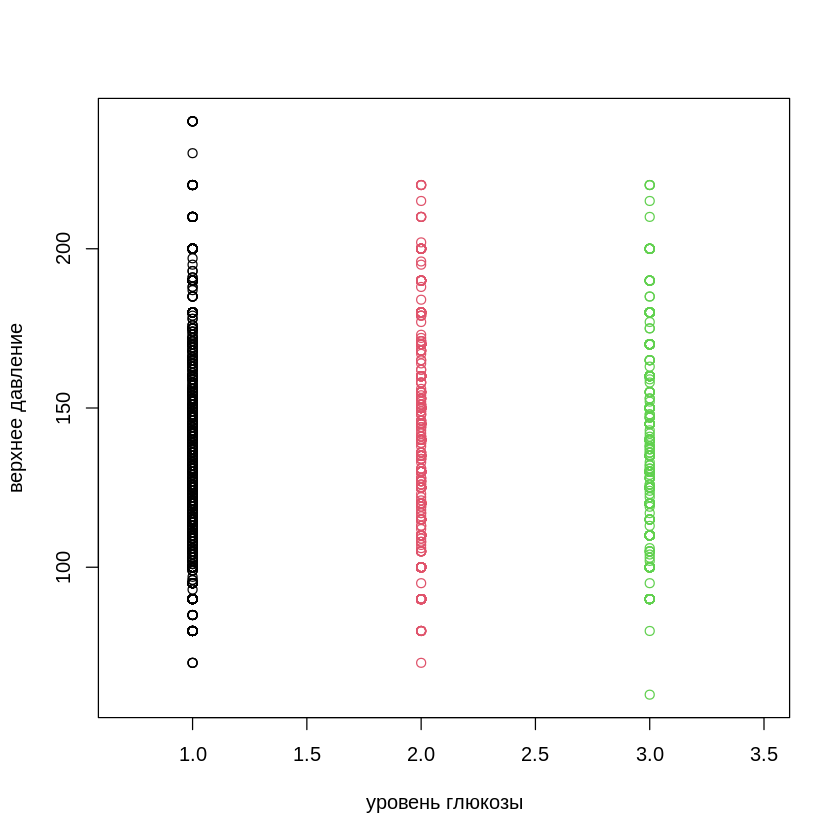

In [31]:
plot(
    tidy_set$gluc, tidy_set$ap_hi, cex=1, col=tidy_set$gluc,
    xlab="уровень глюкозы", ylab="верхнее давление", xlim=c(0.7, 3.5)
)
#данный признак(уровень глюкозы) не влияет на Y

In [34]:
# работаем с выборкой
set.seed(1)
ind <- sample(seq(1, nrow(tidy_set)), 100)
ind

[1] 24388 59521 43307 11571 25173 32618 13903  8229 25305 22306 12204 43809
 [13] 36244 45399  6519 19242 21875 58472 62956 21323 13284  7976  9392  3863
 [25] 52253 26876 13973 31334 39241 47959 28278 66394 11367 13602  5051 16920
 [37] 29660 56659 29697 11854 58661 51118 27075 22126 55091 58684 32987 12399
 [49] 25488 60772 55084 51305 17626  8465  6563 62126 20205 62480 68581 55968
 [61]  8615 41381 45196  9346 13824  8696 61798 61140 39557  7131 61256 51613
 [73] 10816 49461 11096 12597 24450  8613 44660  6217 30249 64953 12669 47181
 [85] 32441 23193 40942 20480 62492 68663 23836 11260  4182 27416 18540  5390
 [97] 30929 21842 18144 30407

In [35]:
ts <- tidy_set[ind,]
head(ts)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
24430,35507,15867,1,160,64,130,90,3,1,0,0,1,1,43
59613,86607,21740,1,159,62,110,70,1,2,0,0,1,1,59
43372,63061,19710,1,160,65,120,80,1,1,0,0,1,1,53
11592,16855,21865,1,164,68,120,80,1,1,0,0,1,0,59
25217,36636,23277,1,157,87,120,80,1,1,0,0,0,1,63
32669,47515,17551,2,167,78,140,100,1,1,0,0,0,1,48


In [36]:
table(ts$gluc) #выборка несбалансированная. Для однофакторного ДА.


 1  2  3 
81 12  7 

In [37]:
table(ts$gender, ts$gluc) # Для многофакторного ДА

   
     1  2  3
  1 49 11  6
  2 32  1  1

In [38]:
set.seed(1)
# g1 - gluc == 1; s1 - gender == 1. Берем выборки верхнего АД одинакового объема для мужчин и женщин с разным уровнем глюкозы(2 фактора), соблюдаем условие случайности и независимости
# g2 - gluc == 2; s2 - gender == 2.
g1_s1 <- sample(tidy_set$ap_hi[tidy_set$gluc==1 & tidy_set$gender==1], 20)
g1_s1
g1_s2 <- sample(tidy_set$ap_hi[tidy_set$gluc==1 & tidy_set$gender==2], 20)
g1_s2

g2_s1 <- sample(tidy_set$ap_hi[tidy_set$gluc==2 & tidy_set$gender==1], 20)
g2_s1
g2_s2 <- sample(tidy_set$ap_hi[tidy_set$gluc==2 & tidy_set$gender==2], 20)
g2_s2

g3_s1 <- sample(tidy_set$ap_hi[tidy_set$gluc==3 & tidy_set$gender==1], 20)
g3_s1
g3_s2 <- sample(tidy_set$ap_hi[tidy_set$gluc==3 & tidy_set$gender==2], 20)
g3_s2

[1] 110 120 110 140 120 110 120 115 120 160 130 140 120 140 140 150 140 120 120
[20] 130

[1] 120  90 120 170 130 120 100 110 120 120 120 120 135 130 120 140  90 110 120
[20] 130

[1] 170 130 130 130 130 120 120 105 130 120 120 100 150 130 120 140 130 120 130
[20] 180

[1] 150 140 160 140 130 140 120 180 140 140 140 120 140 120 130 110 120 120 150
[20] 120

[1] 120 140 130 140 150 140 120 110 180 200 120 130 140 120 110 140 150 150 140
[20] 120

[1] 120 130 130 145 120 140 140 120 160 120 120 150 130 120 145 120 130 150 120
[20] 150

In [39]:
# новый вектор "gender_new" и "gluc_new"
gender_new <- c(rep(1,20), rep(2,20), rep(1,20), rep(2,20), rep(1,20), rep(2,20))
gender_new

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2

In [40]:
gluc_new <- c(rep(1,40), rep(2,40), rep(3,40))
gluc_new

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3

In [41]:
sam_s <-c(g1_s1, g1_s2, g2_s1, g2_s2, g3_s1, g3_s2) # вектор верхнего АД
sam_s

[1] 110 120 110 140 120 110 120 115 120 160 130 140 120 140 140 150 140 120
 [19] 120 130 120  90 120 170 130 120 100 110 120 120 120 120 135 130 120 140
 [37]  90 110 120 130 170 130 130 130 130 120 120 105 130 120 120 100 150 130
 [55] 120 140 130 120 130 180 150 140 160 140 130 140 120 180 140 140 140 120
 [73] 140 120 130 110 120 120 150 120 120 140 130 140 150 140 120 110 180 200
 [91] 120 130 140 120 110 140 150 150 140 120 120 130 130 145 120 140 140 120
[109] 160 120 120 150 130 120 145 120 130 150 120 150

In [42]:
anovaframe <- data.frame(sam_s, gender_new, gluc_new)  # соблюдаются случайность и независимость.
head(anovaframe, 25)

,sam_s,gender_new,gluc_new
,<int>,<dbl>,<dbl>
1,110,1,1
2,120,1,1
3,110,1,1
4,140,1,1
5,120,1,1
6,110,1,1
7,120,1,1
8,115,1,1
9,120,1,1


In [43]:
table(anovaframe$gender_new, anovaframe$gluc_new) #Данные сбалансированые теперь

   
     1  2  3
  1 20 20 20
  2 20 20 20

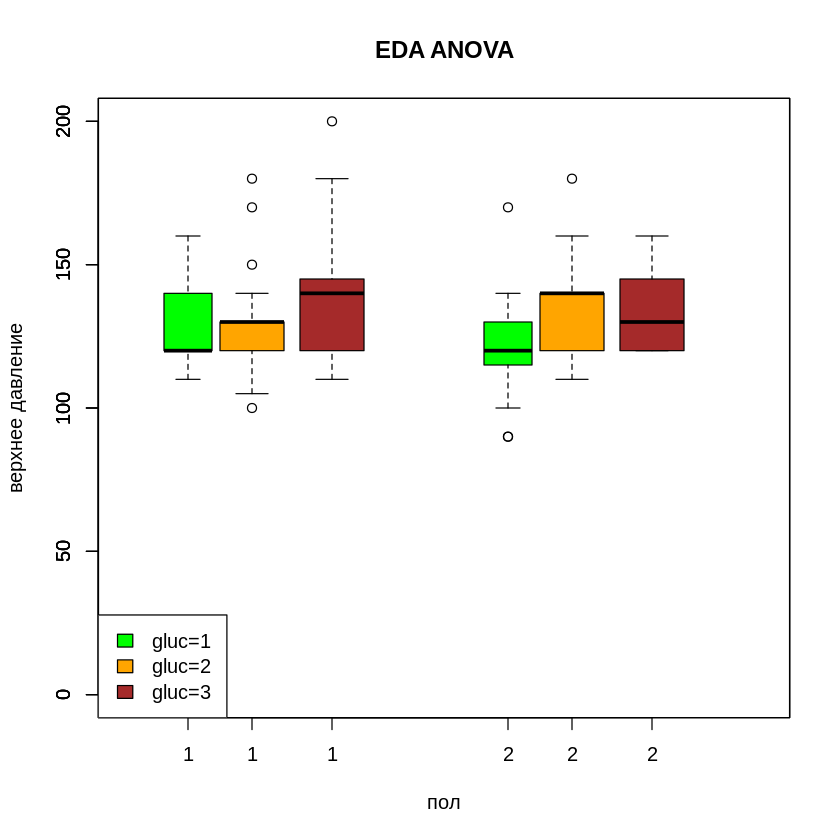

In [44]:
boxplot(
    sam_s~gender_new, data=anovaframe, boxwex=0.15, at=1:2-0.3,
    subset=gluc_new==1, col="green", main="EDA ANOVA",
    xlab="пол", ylab="верхнее давление",
    xlim=c(0.5, 2.5), ylim=c(0, 200)
)
boxplot(
    sam_s~gender_new, data=anovaframe, add=TRUE,
    boxwex=0.2, at=1:2-0.1, subset=gluc_new==2, col="orange"
)
boxplot(
    sam_s~gender_new, data=anovaframe, add=TRUE,
    boxwex=0.2, at=1:2+0.15, subset=gluc_new==3, col="brown"
)
legend(
    "bottomleft",
    c("gluc=1", "gluc=2", "gluc=3"),
    fill=c("green", "orange", "brown")
)

In [45]:
bartlett.test(list(g1_s1, g1_s2, g2_s1, g2_s2, g3_s1, g3_s2)) # критерий Барлетта, наши выборки соотвестуют нормальности,
# можем применить этот критеий. p-value больше альфа, принимаем Н0, различий нет между дисперсиями выборок


	Bartlett test of homogeneity of variances

data:  list(g1_s1, g1_s2, g2_s1, g2_s2, g3_s1, g3_s2)
Bartlett's K-squared = 6.5385, df = 5, p-value = 0.2573


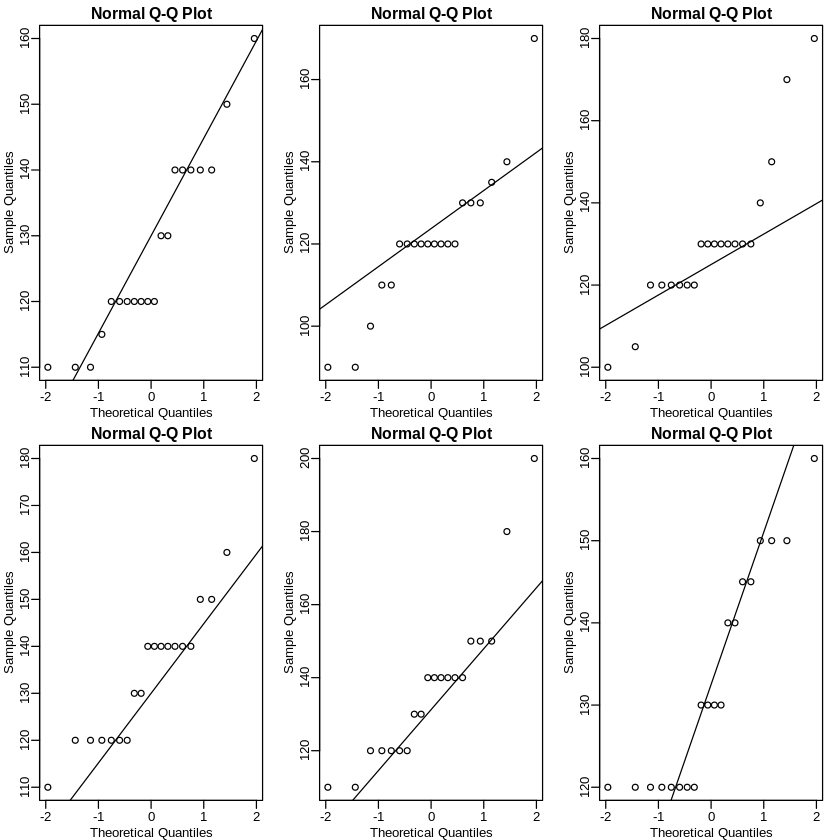

In [46]:
mypar(2,3)
qqnorm(g1_s1)
qqline(g1_s1)
qqnorm(g1_s2)
qqline(g1_s2)
qqnorm(g2_s1)
qqline(g2_s1)
qqnorm(g2_s2)
qqline(g2_s2)
qqnorm(g3_s1)
qqline(g3_s1)
qqnorm(g3_s2)
qqline(g3_s2)
# Отклоненения небольшие от линии есть, но данные сблансированы

In [47]:
summary(aov(sam_s~gender_new + gluc_new + gender_new:gluc_new, data=anovaframe)) #сбалансированые данные, что не влияет на последовательность включения признаков в модель
#глюкоза на границы альфа, может быть статистически знамимым признаком

                     Df Sum Sq Mean Sq F value  Pr(>F)   
gender_new            1    130   130.2   0.426 0.51532   
gluc_new              1   2420  2420.0   7.915 0.00576 **
gender_new:gluc_new   1     31    31.2   0.102 0.74978   
Residuals           116  35468   305.8                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [48]:
summary(aov(sam_s~gluc_new + gender_new + gluc_new:gender_new, data=anovaframe)) #поменяем признаки местами, рез-ты не изменились

                     Df Sum Sq Mean Sq F value  Pr(>F)   
gluc_new              1   2420  2420.0   7.915 0.00576 **
gender_new            1    130   130.2   0.426 0.51532   
gluc_new:gender_new   1     31    31.2   0.102 0.74978   
Residuals           116  35468   305.8                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [49]:
summary(aov(sam_s~gender_new * gluc_new, data=anovaframe)) #взаимодействие факторов глюкоза и пол не имеет статистически значимого эффекта на верхнее АД при альфа 0.05

                     Df Sum Sq Mean Sq F value  Pr(>F)   
gender_new            1    130   130.2   0.426 0.51532   
gluc_new              1   2420  2420.0   7.915 0.00576 **
gender_new:gluc_new   1     31    31.2   0.102 0.74978   
Residuals           116  35468   305.8                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1